In [8]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


In [9]:
# data analysis and wrangling
import pandas as pd
import numpy as np
import random as rnd
import math

import warnings
warnings.filterwarnings("ignore")

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# machine learning
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree

In [10]:
train_df = pd.read_csv('/kaggle/input/titanic/train.csv')
test_df = pd.read_csv('/kaggle/input/titanic/test.csv')
combine = [train_df, test_df]

In [11]:
print(train_df.columns.values)

['PassengerId' 'Survived' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch'
 'Ticket' 'Fare' 'Cabin' 'Embarked']


In [12]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [13]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [14]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


- Cabin has a lot of missing values in train and test => Maybe the person did not have a cabin

In [15]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [16]:
test_df.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [17]:
train_df.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


In [18]:
df = train_df.copy()

In [19]:
df['hasCabin'] = df['Cabin'].apply(lambda x: 1 if x == x else 0)

In [20]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,hasCabin
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0


In [21]:
df.loc[1, "Cabin"] == df.loc[1, "Cabin"]

True

In [22]:
df[["hasCabin", "Survived"]].groupby(['hasCabin'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,hasCabin,Survived
1,1,0.666667
0,0,0.299854


In [23]:
df[["hasCabin", "Pclass"]].groupby(['hasCabin'], as_index=False).count().sort_values(by='Pclass', ascending=False)

,hasCabin,Pclass
0,0,687
1,1,204


In [24]:
for dataset in combine:
    dataset['Title'] = dataset.Name.str.extract(' ([A-Za-z]+)\.', expand=False)

pd.crosstab(train_df['Title'], train_df['Sex'])

Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


In [25]:
for dataset in combine:
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess','Capt', 'Col',\
 	'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')

    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')
    
train_df[['Title', 'Survived']].groupby(['Title'], as_index=False).mean()

,Title,Survived
0,Master,0.575000
1,Miss,0.702703
2,Mr,0.156673
3,Mrs,0.793651
4,Rare,0.347826


In [26]:
title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}
for dataset in combine:
    dataset['Title'] = dataset['Title'].map(title_mapping)
    dataset['Title'] = dataset['Title'].fillna(0)

train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,3
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,3
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1


In [27]:
train_df = train_df.drop(['Name', 'PassengerId'], axis=1)
test_df = test_df.drop(['Name'], axis=1)
combine = [train_df, test_df]
train_df.shape, test_df.shape

((891, 11), (418, 11))

In [28]:
for dataset in combine:
    dataset['Sex'] = dataset['Sex'].map( {'female': 1, 'male': 0} ).astype(int)

train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,0,3,0,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,1,1,1,38.0,1,0,PC 17599,71.2833,C85,C,3
2,1,3,1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,2
3,1,1,1,35.0,1,0,113803,53.1000,C123,S,3
4,0,3,0,35.0,0,0,373450,8.0500,NaN,S,1


In [29]:
guess_ages = np.zeros((2,3))
guess_ages

array([[0., 0., 0.],
       [0., 0., 0.]])

In [30]:
for dataset in combine:
    for i in range(0, 2):
        for j in range(0, 3):
            guess_df = dataset[(dataset['Sex'] == i) & \
                                  (dataset['Pclass'] == j+1)]['Age'].dropna()

            # age_mean = guess_df.mean()
            # age_std = guess_df.std()
            # age_guess = rnd.uniform(age_mean - age_std, age_mean + age_std)

            age_guess = guess_df.median()

            # Convert random age float to nearest .5 age
            guess_ages[i,j] = int( age_guess/0.5 + 0.5 ) * 0.5
            
    for i in range(0, 2):
        for j in range(0, 3):
            dataset.loc[ (dataset.Age.isnull()) & (dataset.Sex == i) & (dataset.Pclass == j+1),\
                    'Age'] = guess_ages[i,j]

    dataset['Age'] = dataset['Age'].astype(int)

train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,0,3,0,22,1,0,A/5 21171,7.2500,NaN,S,1
1,1,1,1,38,1,0,PC 17599,71.2833,C85,C,3
2,1,3,1,26,0,0,STON/O2. 3101282,7.9250,NaN,S,2
3,1,1,1,35,1,0,113803,53.1000,C123,S,3
4,0,3,0,35,0,0,373450,8.0500,NaN,S,1


In [31]:
for dataset in combine:    
    dataset.loc[ dataset['Age'] <= 16, 'Age'] = 0
    dataset.loc[(dataset['Age'] > 16) & (dataset['Age'] <= 32), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 32) & (dataset['Age'] <= 48), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 48) & (dataset['Age'] <= 64), 'Age'] = 3
    dataset.loc[ dataset['Age'] > 64, 'Age']
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,0,3,0,1,1,0,A/5 21171,7.2500,NaN,S,1
1,1,1,1,2,1,0,PC 17599,71.2833,C85,C,3
2,1,3,1,1,0,0,STON/O2. 3101282,7.9250,NaN,S,2
3,1,1,1,2,1,0,113803,53.1000,C123,S,3
4,0,3,0,2,0,0,373450,8.0500,NaN,S,1


In [32]:
for dataset in combine:
    dataset['FamilySize'] = dataset['SibSp'] + dataset['Parch'] + 1

train_df[['FamilySize', 'Survived']].groupby(['FamilySize'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,FamilySize,Survived
3,4,0.724138
2,3,0.578431
1,2,0.552795
6,7,0.333333
0,1,0.303538
4,5,0.200000
5,6,0.136364
7,8,0.000000
8,11,0.000000


In [33]:
for dataset in combine:
    dataset['IsAlone'] = 0
    dataset.loc[dataset['FamilySize'] == 1, 'IsAlone'] = 1

train_df[['IsAlone', 'Survived']].groupby(['IsAlone'], as_index=False).mean()

,IsAlone,Survived
0,0,0.505650
1,1,0.303538


In [34]:
train_df = train_df.drop(['Parch', 'SibSp', 'FamilySize'], axis=1)
test_df = test_df.drop(['Parch', 'SibSp', 'FamilySize'], axis=1)
combine = [train_df, test_df]

train_df.head()

,Survived,Pclass,Sex,Age,Ticket,Fare,Cabin,Embarked,Title,IsAlone
0,0,3,0,1,A/5 21171,7.2500,NaN,S,1,0
1,1,1,1,2,PC 17599,71.2833,C85,C,3,0
2,1,3,1,1,STON/O2. 3101282,7.9250,NaN,S,2,1
3,1,1,1,2,113803,53.1000,C123,S,3,0
4,0,3,0,2,373450,8.0500,NaN,S,1,1


In [35]:
for dataset in combine:
    dataset['Age*Class'] = dataset.Age * dataset.Pclass

In [36]:
freq_port = train_df.Embarked.dropna().mode()[0]
freq_port

'S'

In [37]:
for dataset in combine:
    dataset['Embarked'] = dataset['Embarked'].fillna(freq_port)
    
train_df[['Embarked', 'Survived']].groupby(['Embarked'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.339009


In [38]:
for dataset in combine:
    dataset['Embarked'] = dataset['Embarked'].map( {'S': 0, 'C': 1, 'Q': 2} ).astype(int)

In [39]:
test_df['Fare'].fillna(test_df['Fare'].dropna().median(), inplace=True)
test_df.head()

,PassengerId,Pclass,Sex,Age,Ticket,Fare,Cabin,Embarked,Title,IsAlone,Age*Class
0,892,3,0,2,330911,7.8292,NaN,2,1,1,6
1,893,3,1,2,363272,7.0000,NaN,0,3,0,6
2,894,2,0,3,240276,9.6875,NaN,2,1,1,6
3,895,3,0,1,315154,8.6625,NaN,0,1,1,3
4,896,3,1,1,3101298,12.2875,NaN,0,3,0,3


In [40]:
for dataset in combine:
    dataset['Age*Class'] = dataset.Age * dataset.Pclass

In [41]:
train_df.head()

,Survived,Pclass,Sex,Age,Ticket,Fare,Cabin,Embarked,Title,IsAlone,Age*Class
0,0,3,0,1,A/5 21171,7.2500,NaN,0,1,0,3
1,1,1,1,2,PC 17599,71.2833,C85,1,3,0,2
2,1,3,1,1,STON/O2. 3101282,7.9250,NaN,0,2,1,3
3,1,1,1,2,113803,53.1000,C123,0,3,0,2
4,0,3,0,2,373450,8.0500,NaN,0,1,1,6


In [42]:
train_df['FareBand'] = pd.qcut(train_df['Fare'], 4)

In [43]:
train_df[['FareBand', 'Survived']].groupby(['FareBand'], as_index=False).mean().sort_values(by='FareBand', ascending=True)

,FareBand,Survived
0,"(-0.001, 7.91]",0.197309
1,"(7.91, 14.454]",0.303571
2,"(14.454, 31.0]",0.454955
3,"(31.0, 512.329]",0.581081


In [44]:
for dataset in combine:
    dataset.loc[ dataset['Fare'] <= 7.91, 'Fare'] = 0
    dataset.loc[(dataset['Fare'] > 7.91) & (dataset['Fare'] <= 14.454), 'Fare'] = 1
    dataset.loc[(dataset['Fare'] > 14.454) & (dataset['Fare'] <= 31), 'Fare']   = 2
    dataset.loc[ dataset['Fare'] > 31, 'Fare'] = 3
    dataset['Fare'] = dataset['Fare'].astype(int)

train_df = train_df.drop(['FareBand'], axis=1)
combine = [train_df, test_df]

In [45]:
for dataset in combine:
    dataset['hasCabin'] = dataset['Cabin'].apply(lambda x: 1 if x == x else 0)    

In [46]:
train_df = train_df.drop(['Ticket','Cabin'], axis=1)
test_df = test_df.drop(['Ticket','Cabin'], axis=1)  

In [47]:
train_df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,Age*Class,hasCabin
0,0,3,0,1,0,0,1,0,3,0
1,1,1,1,2,3,1,3,0,2,1
2,1,3,1,1,1,0,2,1,3,0
3,1,1,1,2,3,0,3,0,2,1
4,0,3,0,2,1,0,1,1,6,0


In [48]:
test_df.head()

,PassengerId,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,Age*Class,hasCabin
0,892,3,0,2,0,2,1,1,6,0
1,893,3,1,2,0,0,3,0,6,0
2,894,2,0,3,1,2,1,1,6,0
3,895,3,0,1,1,0,1,1,3,0
4,896,3,1,1,1,0,3,0,3,0


In [49]:
X_train = train_df.drop("Survived", axis=1)
Y_train = train_df["Survived"]
X_test  = test_df.drop("PassengerId", axis=1).copy()
X_train.shape, Y_train.shape, X_test.shape

((891, 9), (891,), (418, 9))

# Decision Tree

### Fine Tuning

In [56]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

In [57]:
param_grid = {
    'max_depth': [None, 10, 12, 15, 20, 25],
    'min_samples_split': [2, 3, 5, 7, 10],
    'min_samples_leaf': [1, 2, 3, 4]
}

clf = DecisionTreeClassifier()

grid_search = GridSearchCV(estimator=clf, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, Y_train)

decision_tree_params = grid_search.best_params_

print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

Best Parameters: {'max_depth': None, 'min_samples_leaf': 3, 'min_samples_split': 2}
Best Score: 0.8047203565375682


### K-Fold cross validation

In [58]:
from sklearn.model_selection import cross_val_score
from sklearn.tree import plot_tree

In [59]:
decision_tree = DecisionTreeClassifier(**decision_tree_params)
decision_tree.fit(X_train, Y_train)
Y_pred = decision_tree.predict(X_test)
acc_dt_train = round(decision_tree.score(X_train, Y_train) * 100, 2)

scores = cross_val_score(decision_tree, X_train, Y_train, cv=5, scoring="accuracy") 

print("Training Accuracy:", acc_dt_train)
print("Cross-validation scores for each fold:", scores)
print("Mean accuracy score:", np.mean(scores))

Training Accuracy: 85.63
Cross-validation scores for each fold: [0.79888268 0.78089888 0.82022472 0.80337079 0.82022472]
Mean accuracy score: 0.8047203565375682


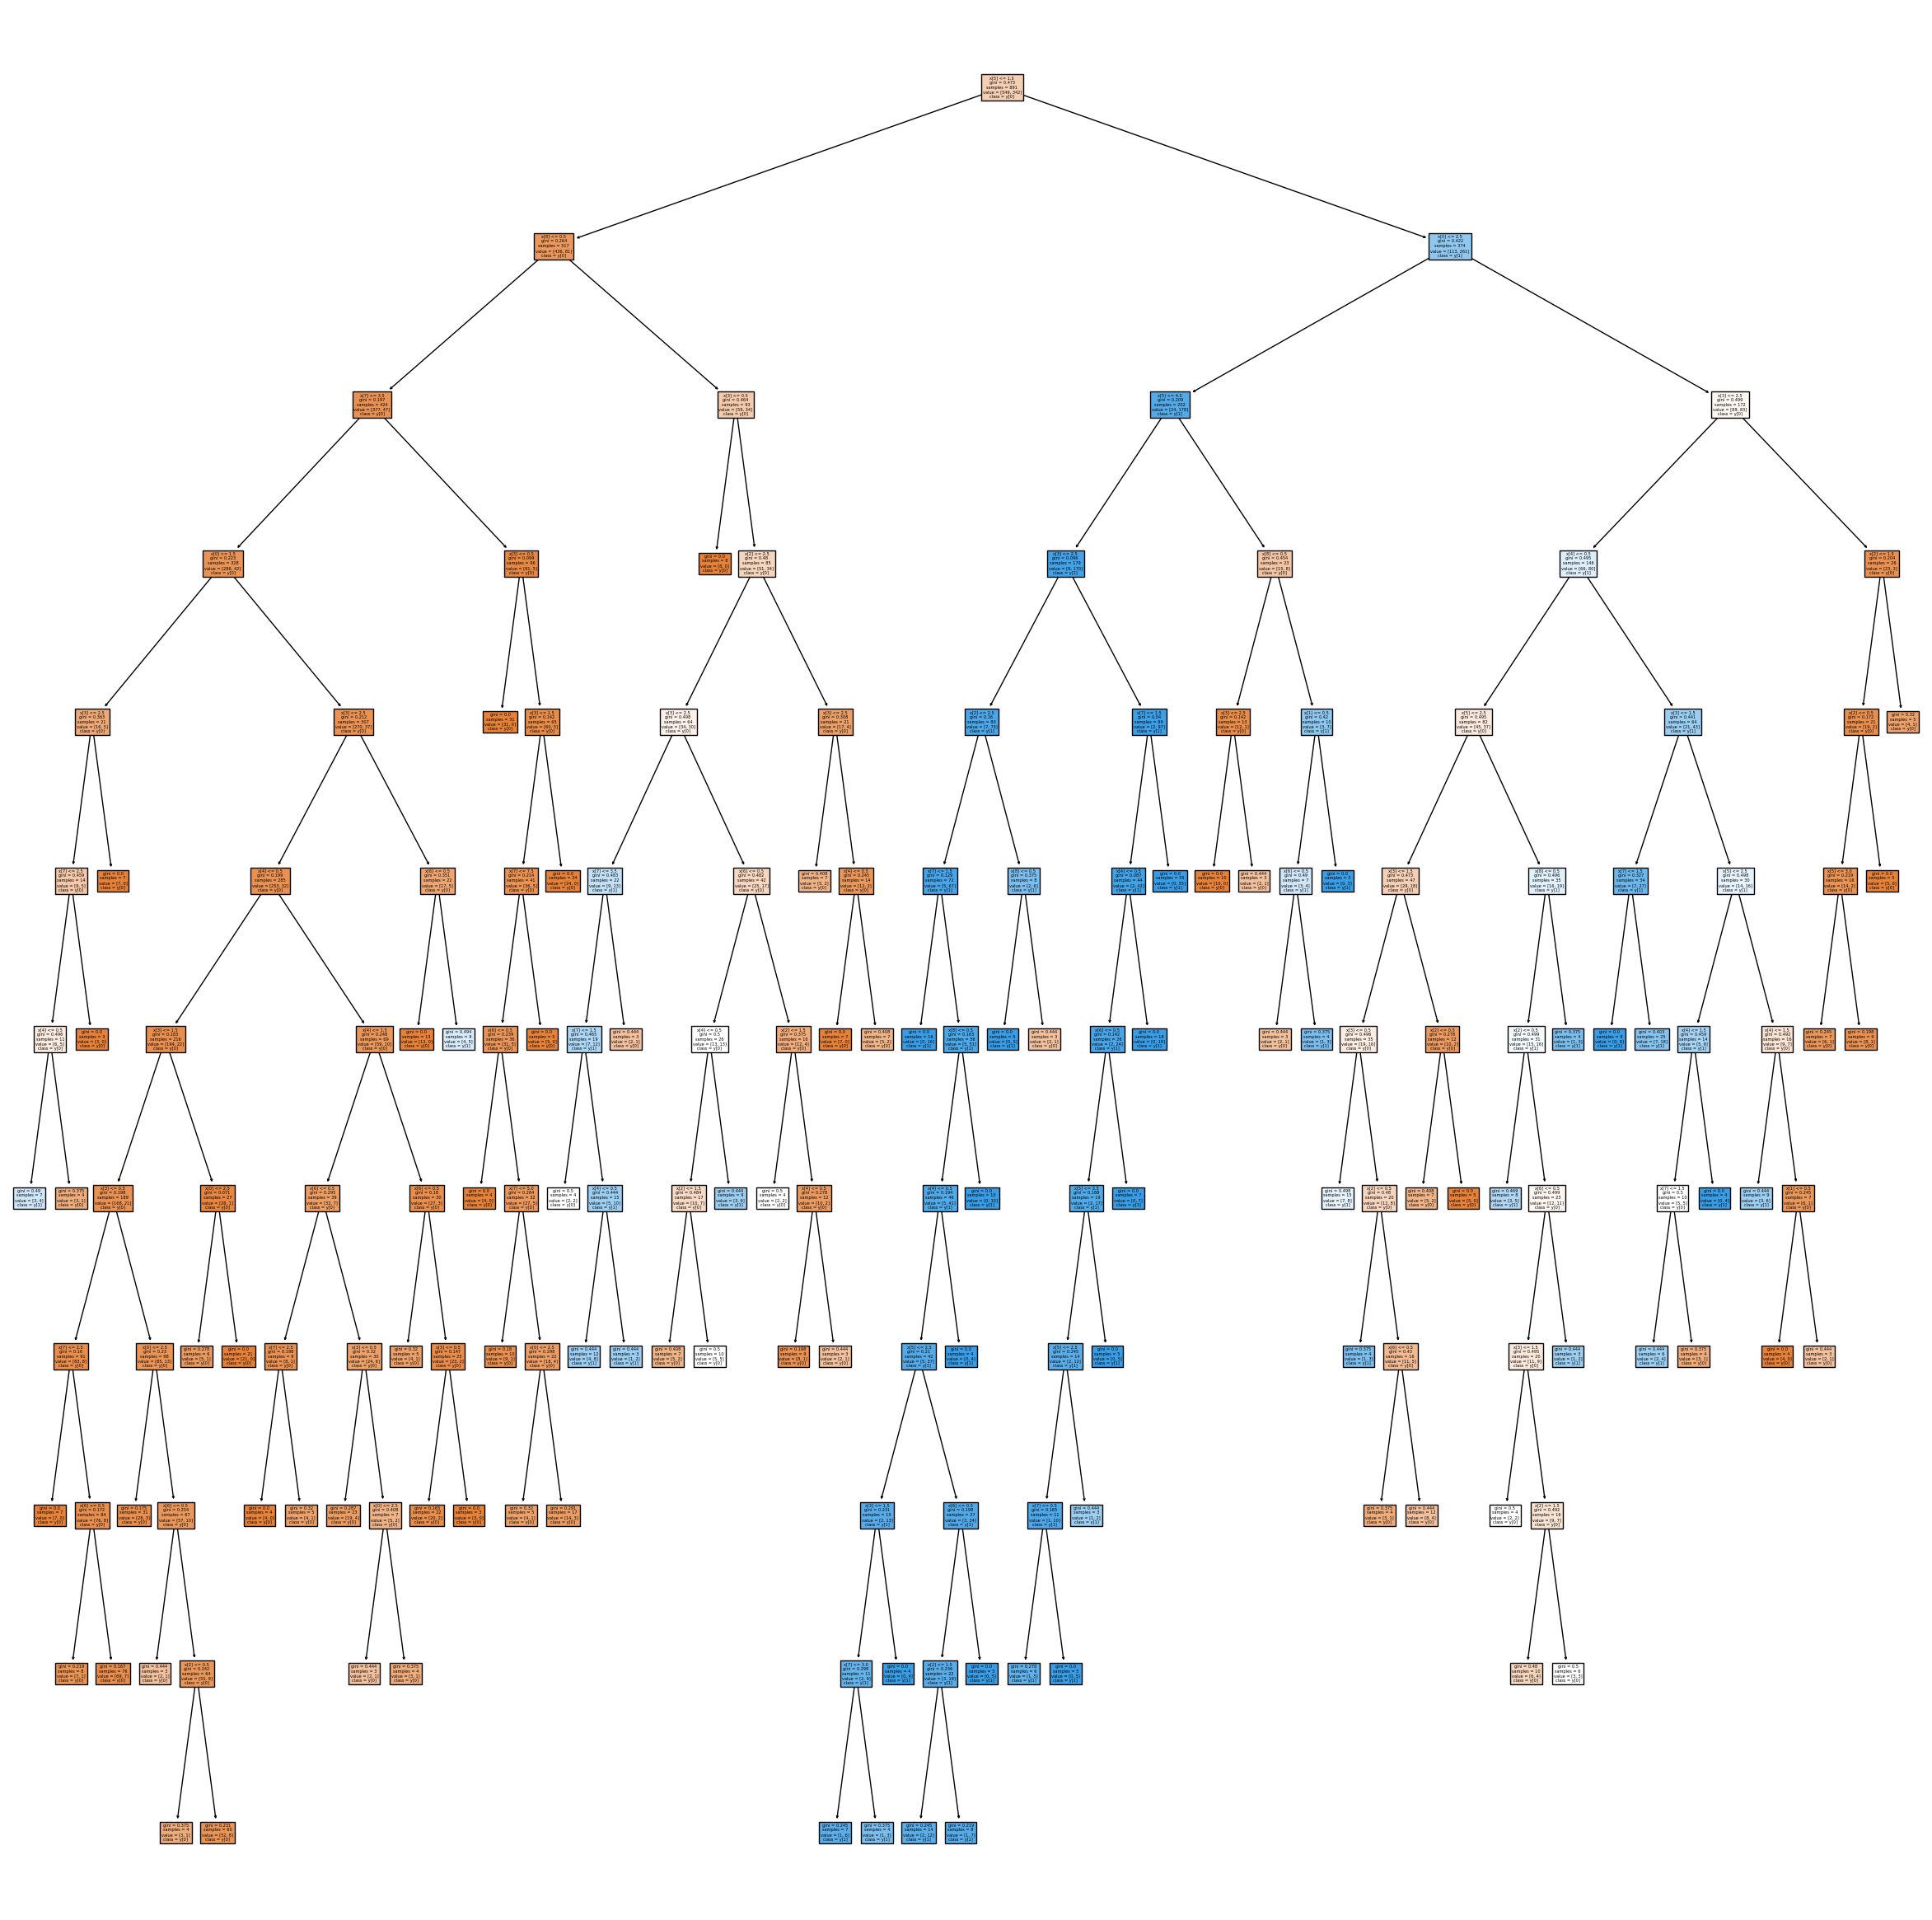

In [60]:
plt.figure(figsize=(30,30))
plot_tree(decision_tree, class_names=True, filled=True)
plt.show()

# Random Forest

### Fine Tuning

In [63]:
param_grid = {
    'n_estimators': [100, 150, 200, 250, 300],
    'max_depth': [10, 15, 20, 30],
    'min_samples_split': [2, 3, 4, 5, 7, 10],
    'min_samples_leaf': [2, 3, 4]
}

clf = RandomForestClassifier()

grid_search = GridSearchCV(estimator=clf, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, Y_train)

random_forest_params = grid_search.best_params_

print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

Best Parameters: {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 7, 'n_estimators': 150}
Best Score: 0.826062394074446


### Cross Validation

In [64]:
rf = RandomForestClassifier(**random_forest_params)
rf.fit(X_train, Y_train)
Y_pred = rf.predict(X_test)
acc_rf_train = round(rf.score(X_train, Y_train) * 100, 2)

scores = cross_val_score(rf, X_train, Y_train, cv=5, scoring="accuracy") 

print("Training Accuracy:", acc_rf_train)
print("Cross-validation scores for each fold:", scores)
print("Mean accuracy score:", np.mean(scores))

Training Accuracy: 86.08
Cross-validation scores for each fold: [0.80446927 0.78651685 0.84269663 0.80337079 0.84831461]
Mean accuracy score: 0.8170736300295023
